In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

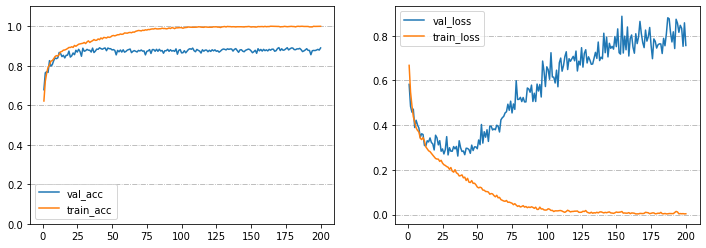

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(12, 4))

val_central = []
train_central = []
val_loss_central = []
train_loss_central = []
with open('dr_central.out','r') as f: #VGG16- weights=None
# with open('old/aug_testingset/dr224.out','r') as f: #VGG16- weights=None
    for line in f:
        if line[:5] == '32/32':
            a=line
            val_central.append(float(line.split(' ')[-1]))
            train_central.append(float(line.split(' ')[-7]))
            val_loss_central.append(float(line.split(' ')[-4]))
            train_loss_central.append(float(line.split(' ')[-10]))
epo = [i+1 for i in range(200)]
ax[0].plot(epo,val_central[:200],label='val_acc')
ax[0].plot(epo,train_central[:200],label='train_acc')
ax[0].set_ylim([0,1.1])
ax[0].legend()
ax[1].plot(epo,val_loss_central,label='val_loss')
ax[1].plot(epo,train_loss_central,label='train_loss')
ax[1].legend()
ax[0].grid(axis="y",ls='-.')
ax[1].grid(axis="y",ls='-.')

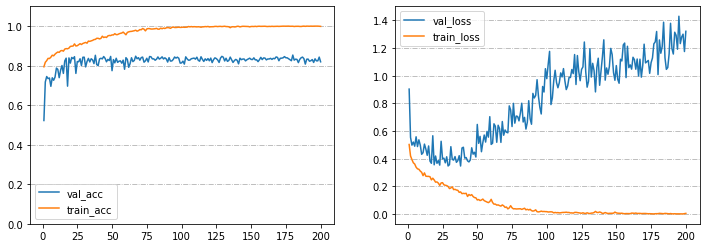

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(12, 4))

val_sub = []
train_sub = []
val_loss_sub = []
train_loss_sub = []
with open('dr_sub1.out','r') as f: #VGG16- weights=None
# with open('old/aug_testingset/dr224.out','r') as f: #VGG16- weights=None
    for line in f:
        if line[:5] == '17/17':
            a=line
            val_sub.append(float(line.split(' ')[-1]))
            train_sub.append(float(line.split(' ')[-7]))
            val_loss_sub.append(float(line.split(' ')[-4]))
            train_loss_sub.append(float(line.split(' ')[-10]))
epo = [i+1 for i in range(200)]
ax[0].plot(epo,val_sub[:200],label='val_acc')
ax[0].plot(epo,train_sub[:200],label='train_acc')
ax[0].set_ylim([0,1.1])
ax[0].legend()
ax[1].plot(epo,val_loss_sub,label='val_loss')
ax[1].plot(epo,train_loss_sub,label='train_loss')
ax[1].legend()
ax[0].grid(axis="y",ls='-.')
ax[1].grid(axis="y",ls='-.')

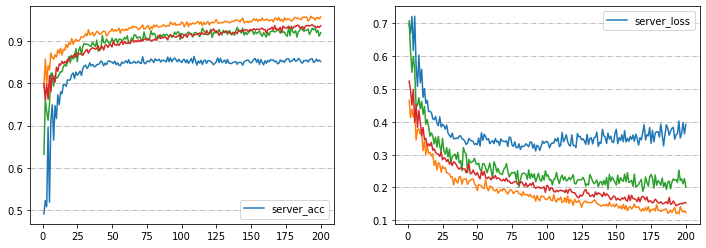

In [4]:
epo = [i+1 for i in range(200)]

server = pd.read_csv('server.txt',header=None,sep=' ',names=['loss','acc'])

worker1 = pd.read_csv('worker1.txt',header=None,sep=' ',names=['loss','acc'])
worker2 = pd.read_csv('worker2.txt',header=None,sep=' ',names=['loss','acc'])
worker3 = pd.read_csv('worker3.txt',header=None,sep=' ',names=['loss','acc'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(12, 4))


server_acc = server['acc'].values[:200]
worker1_acc = [float(s[1:-1]) for s in worker1['acc'].values]
worker2_acc = [float(s[1:-1]) for s in worker2['acc'].values]
worker3_acc = [float(s[1:-1]) for s in worker3['acc'].values]

fed_epo = [i+1 for i in range(200)]
ax[0].plot(fed_epo, server_acc,label='server_acc')
ax[0].plot(epo, worker1_acc)
ax[0].plot(epo, worker2_acc)
ax[0].plot(epo, worker3_acc)
ax[0].legend()
ax[0].grid(axis="y",ls='-.')


server_loss = server['loss'].values[:200]
worker1_loss = [float(s[1:-1]) for s in worker1['loss'].values]
worker2_loss = [float(s[1:-1]) for s in worker2['loss'].values]
worker3_loss = [float(s[1:-1]) for s in worker3['loss'].values]

ax[1].plot(fed_epo, server_loss,label='server_loss')
ax[1].plot(epo, worker1_loss)
ax[1].plot(epo, worker2_loss)
ax[1].plot(epo, worker3_loss)
ax[1].legend()
ax[1].grid(axis="y",ls='-.')

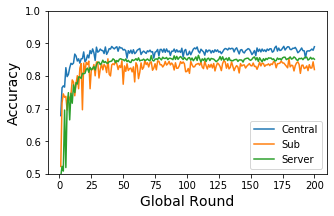

In [10]:
plt.plot(epo,val_central[:200],label='Central')
plt.plot(epo,val_sub[:200],label='Sub')
plt.plot(fed_epo, server_acc,label='Server')

plt.gcf().set_size_inches(5, 3)

plt.xlabel('Global Round',fontsize=14)  
plt.ylabel('Accuracy',fontsize=14) 

plt.ylim([0.5,1])
plt.legend()

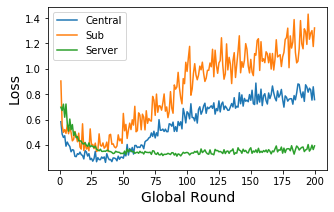

In [12]:
plt.plot(epo,val_loss_central[:200],label='Central')
plt.plot(epo,val_loss_sub[:200],label='Sub')
plt.plot(fed_epo, server_loss,label='Server')

plt.gcf().set_size_inches(5, 3)

plt.xlabel('Global Round',fontsize=14)  
plt.ylabel('Loss',fontsize=14) 

# plt.ylim([0.5,1])
plt.legend()